In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [40]:
import assaytools

In [41]:
from assaytools import platereader

In [42]:
filenames = [
    'p38_Bos_conc0_20180316_151003.xml',
    'p38_Bos_conc1_20180316_152305.xml',
    'p38_Bos_conc2_20180316_153609.xml',
    'p38_Bos_conc3_20180316_160633.xml',
    'p38_Bos_conc4_20180316_161933.xml',
    'p38_Bos_conc5_20180316_163234.xml',
    'p38_Bos_conc6_20180316_164537.xml',
    'p38_Bos_conc7_20180316_165840.xml',
    'p38_Bos_conc8_20180316_171209.xml',
    'p38_Bos_conc9_20180316_172511.xml',
    'p38_Bos_conc10_20180316_173812.xml',
    'p38_Bos_conc11_20180316_175119.xml',
    'p38_Bos_conc12_20180316_180420.xml',
    'p38_Bos_conc13_20180316_181722.xml',
    'p38_Bos_conc14_20180316_183025.xml',
    'p38_Bos_conc15_20180316_184327.xml',
    'p38_Bos_conc16_20180316_185636.xml',
]
datapath = '20180316_p38_and_boiled_p38_with_Bos_test'

In [43]:
concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06,
         2.48263378e-06,   4.18255821e-06,   7.04646547e-06,
         1.18713651e-05,   2.00000000e-05])

In [44]:
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


17

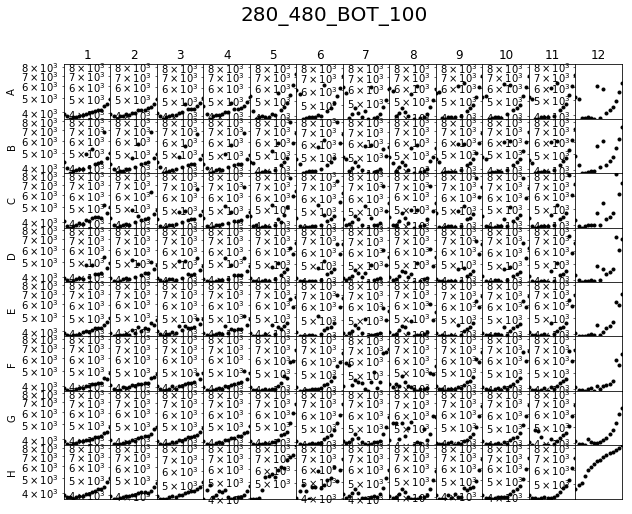

In [45]:
fig = plt.figure(figsize=[10,8])
nrows = 8
ncols = 12
index = 0

label = '280_480_BOT_100'
data = np.zeros([nrows, ncols, nreads], np.float64)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        measurements = [ reads[i][label][well] for i in range(nreads) ]        
        data[row_index,col_index,:] = np.array(measurements)

xmax = concentrations.max()
ymax = data.max().max().max()
        
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        plt.loglog(concentrations, data[row_index,col_index,:], 'k.');
        plt.axis([0, xmax, 0, ymax])
        plt.xticks([]);
        plt.yticks([]);
        if row_index == 0:
            plt.title(col);
        if col_index == 0:
            plt.ylabel(row);
        index += 1
        
plt.suptitle(label, fontsize=20)
#plt.tight_layout();
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('p38_bos_%s.pdf' % label, dpi=500)
len(measurements)

In [85]:
filenames = [
'p38_Bos_conc16_spectra_20180316_190107.xml'
]

datapath = '20180316_p38_and_boiled_p38_with_Bos_test'

In [86]:
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


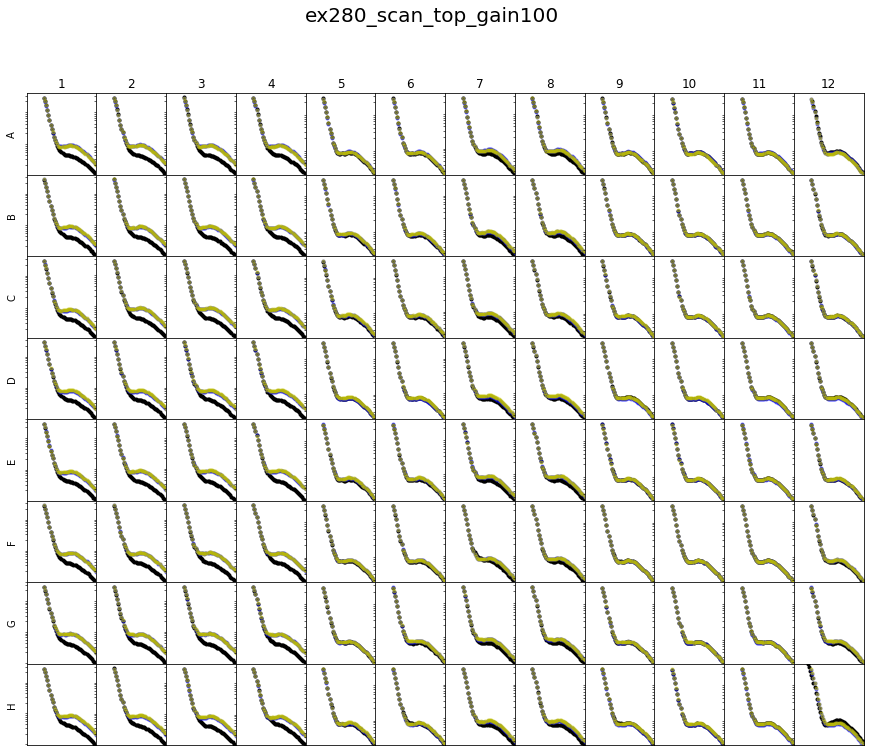

In [108]:
fig = plt.figure(figsize=[15,12])
nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'

nreads=len(list(reads[0][label][well].keys()))
data = np.zeros([nrows, ncols, nreads], np.float64)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = list(reads[0][label][well].values())
        measurements = [x if x != 'OVER' else 0.0 for x in measurements]
        data[row_index,col_index,:] = np.array(measurements)

        
ymax = data.max().max().max()
xmax = max(list(reads[0][label][well].keys()))
xmin = min(list(reads[0][label][well].keys()))
           
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        plt.semilogy(x_values, data[row_index,col_index,:], 'k.');
        plt.semilogy(x_values, data[row_index,9,:], 'b.', alpha=.5);
        plt.semilogy(x_values, data[row_index,10,:], 'y.', alpha=0.5);
        plt.axis([xmin, xmax, 0, ymax])
        plt.xticks([]);
        plt.yticks([]);
        if row_index == 0:
            plt.title(col);
        if col_index == 0:
            plt.ylabel(row);
        index += 1
        
plt.suptitle(label, fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('p38_bos_%s_logy.pdf' % label, dpi=500)

In [109]:
filenames = [
'p38_Bos_conc16_spectra_20180319_reread.xml'
]

datapath = '20180316_p38_and_boiled_p38_with_Bos_test'
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)

In [1]:
fig = plt.figure(figsize=[15,12])
nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'

nreads=len(list(reads[0][label][well].keys()))
data = np.zeros([nrows, ncols, nreads], np.float64)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = [reads[i][label][well].values() for i in range(nreads)]
        measurements = [x if x != 'OVER' else 0.0 for x in measurements]
        data[row_index,col_index,:] = np.array(measurements)

        
ymax = data.max().max().max()
xmax = max(list(reads[0][label][well].keys()))
xmin = min(list(reads[0][label][well].keys()))
           
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        plt.semilogy(x_values, data[row_index,col_index,:], 'k.');
        plt.semilogy(x_values, data[row_index,9,:], 'b.', alpha=.5);
        plt.semilogy(x_values, data[row_index,10,:], 'y.', alpha=0.5);
        plt.axis([xmin, xmax, 0, ymax])
        plt.xticks([]);
        plt.yticks([]);
        if row_index == 0:
            plt.title(col);
        if col_index == 0:
            plt.ylabel(row);
        index += 1
        
plt.suptitle(label, fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('p38_bos_%s_logy_rereadplate.pdf' % label, dpi=500)

NameError: name 'plt' is not defined